<table class="table table-bordered">
    <tr>
        <th style="text-align:center; width:25%"><img src='https://www.np.edu.sg/PublishingImages/Pages/default/odp/ICT.jpg' style="width: 250px; height: 125px; "></th>
        <th style="text-align:center;"><h1>Deep Learning</h1><h2>Assignment 1 - Food Classification Model (Individual)</h2><h3>AY2022/23 Semester</h3></th>
    </tr>
</table>

In [1]:
# Import the Required Packages
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras import regularizers
from keras import layers
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
from keras.models import load_model
%matplotlib inline

## Step 1: Data Loading

In [6]:
# Setting variables for each directory train, test, validation
base_dir = r'/Users/dominiclee/Library/CloudStorage/OneDrive-NgeeAnnPolytechnic/Polytechnic/Year 2 Semester 1/DL/Asg 1'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

In [7]:
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

In [9]:
img_size = 100

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 100 by 100
        batch_size=32,
        target_size=(img_size, img_size),
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=32,
        class_mode='categorical')

FileNotFoundError: [WinError 3] The system cannot find the path specified: '/Users/dominiclee/Library/CloudStorage/OneDrive-NgeeAnnPolytechnic/Polytechnic/Year 2 Semester 1/DL/Asg 1\\train'

## Step 2:  Develop the Image Classification Models

In [11]:
def build_run(model, optimizer, loss, metrics, epochs, spe, vs, train_g=train_generator, val_g=validation_generator):
    model.compile(loss=loss,
                optimizer=optimizer,
                metrics=metrics)
    history = model.fit(
        train_generator,
        steps_per_epoch=spe,
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=vs)
    return result

def plot(result):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))

    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.figure()

    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()

NameError: name 'train_generator' is not defined

In [ ]:
# Function to Build run and plot model

model = Sequential()
model.add(layers.Conv2D(128, (3, 3), activation="relu", input_shape=(img_size,img_size,3)))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation="relu"))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation="relu"))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation="relu"))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation="relu", kernel_regularizer=regularizers.L2(0.01)))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(64, activation="relu", kernel_regularizer=regularizers.L2(0.01)))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(10, activation="softmax"))

result = build_run(model=model, 
                   optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                   loss='categorical_crossentropy',
                   metrics=['acc'],
                   spe=7500/32,
                   vs=2000/32
                    )

plot(result)



### Model #1

Epoch 1/100
234/234 [==============================] - 106s 452ms/step - loss: 2.8420 - acc: 0.1215 - val_loss: 2.3313 - val_acc: 0.1725
Epoch 2/100
234/234 [==============================] - 114s 485ms/step - loss: 2.2691 - acc: 0.1868 - val_loss: 2.1262 - val_acc: 0.2430
Epoch 3/100
234/234 [==============================] - 121s 516ms/step - loss: 2.1474 - acc: 0.2307 - val_loss: 2.0054 - val_acc: 0.2760
Epoch 4/100
234/234 [==============================] - 125s 533ms/step - loss: 2.0553 - acc: 0.2676 - val_loss: 1.9244 - val_acc: 0.2965
Epoch 5/100
234/234 [==============================] - 130s 554ms/step - loss: 1.9684 - acc: 0.2925 - val_loss: 1.8810 - val_acc: 0.3230
Epoch 6/100
234/234 [==============================] - 133s 568ms/step - loss: 1.9156 - acc: 0.3179 - val_loss: 1.8418 - val_acc: 0.3225
Epoch 7/100
234/234 [==============================] - 134s 571ms/step - loss: 1.8671 - acc: 0.3375 - val_loss: 1.7449 - val_acc: 0.3625
Epoch 8/100
234/234 [====================

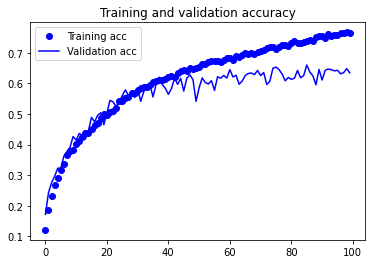

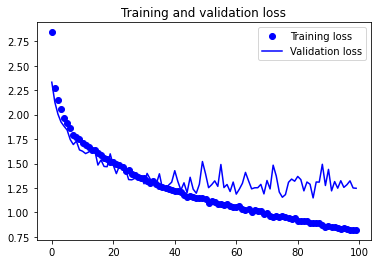

In [15]:
model = Sequential()
model.add(layers.Conv2D(128, (3, 3), activation="relu", input_shape=(img_size,img_size,3)))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation="relu"))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation="relu"))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation="relu"))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation="relu", kernel_regularizer=regularizers.L2(0.01)))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(64, activation="relu", kernel_regularizer=regularizers.L2(0.01)))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(10, activation="softmax"))
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
              metrics=['acc'])
history = model.fit(
      train_generator,
      steps_per_epoch=7500/32, #train_sample_size/data_batch_size
      epochs=100,
      validation_data=validation_generator,
      validation_steps=2000/32)

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [16]:
# Save the Model
model.save('food_model_1.h5')

### Model #2

In [19]:
from tensorflow.keras.applications import VGG16

In [21]:
img_size = 100
pre_train = VGG16(input_shape=(img_size, img_size, 3), include_top=False, weights="imagenet")
pre_train.trainable = True

set_trainable = False
for layer in pre_train.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

model2 = Sequential()
model2.add(pre_train)
model2.add(layers.Flatten())
model2.add(layers.Dense(64, activation="relu"))
model2.add(layers.Dense(128, activation="relu"))
model2.add(layers.Dense(256, activation="relu"))
model2.add(layers.Dense(10, activation="softmax"))

model2.summary()

model2.compile(optimizer=optimizers.Adam(0.0003),
              loss='binary_crossentropy',
              metrics=['acc'])

history = model2.fit(train_generator,
                    epochs=7,
                    batch_size=32,
                    steps_per_epoch = 7500/32,
                    validation_data=validation_generator,
                    validation_steps=2000/32)


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 3, 3, 512)         14714688  
                                                                 
 flatten_6 (Flatten)         (None, 4608)              0         
                                                                 
 dense_21 (Dense)            (None, 64)                294976    
                                                                 
 dense_22 (Dense)            (None, 128)               8320      
                                                                 
 dense_23 (Dense)            (None, 256)               33024     
                                                                 
 dense_24 (Dense)            (None, 10)                2570      
                                                                 
Total params: 15,053,578
Trainable params: 7,418,314
N

In [22]:
# Save the Model
model2.save('food_model_2.h5')

## Step 3 – Evaluate the Developed Models using Testing Images

In [6]:
# Model 1
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=32,
        class_mode='categorical')

model1 = keras.models.load_model('food_model_1.h5')
test_loss, test_acc = model1.evaluate(test_generator, steps=500/32)
print('test acc:', test_acc)

Found 500 images belonging to 10 classes.


2022-06-17 21:29:13.334976: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


15/15 [==============================] - 2s 119ms/step - loss: 1.2679 - acc: 0.6640
test acc: 0.6639999747276306


In [7]:
# Model 2
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=32,
        class_mode='categorical')

model2 = keras.models.load_model('food_model_2.h5')
test_loss, test_acc = model2.evaluate(test_generator, steps=500/32)
print('test acc:', test_acc)

Found 500 images belonging to 10 classes.
15/15 [==============================] - 10s 600ms/step - loss: 0.1412 - acc: 0.7160
test acc: 0.7160000205039978


In [24]:
# Save the best model
model2.save('food_model_best.h5')

## Step 4  – Use the best model to make prediction

In [8]:
# Load the model
model = keras.models.load_model('food_model_best.h5')

In [16]:
# Load the food list (in alphabetical order)
with open('5.txt', 'r') as f: # the .txt file which contains a list of food assigned to you
    x = f.readlines()
food_list =[]
for item in x:
    food_list.append(item.strip('\n'))
food_list = sorted(food_list) # food_list needs to be sorted alphabetically before feed into prediction() function
print(food_list)

['filet_mignon', 'foie_gras', 'french_toast', 'frozen_yogurt', 'hummus', 'ice_cream', 'macarons', 'mussels', 'pad_thai', 'tacos']


In [13]:
# Define some related functions for image process and model prediction
from tensorflow.keras.preprocessing.image import load_img, img_to_array
def image_process(img):
    image = load_img(img, target_size =(img_size, img_size))
    image_array = img_to_array(image)/255
    return image_array

import pandas as pd
def prediction(model, img_array, items_l):
    prob = model.predict(img_array.reshape(1,img_size,img_size,3))
    pro_df = pd.DataFrame(prob, columns = items_l)
    result = items_l[np.argmax(prob)]
    return pro_df, result

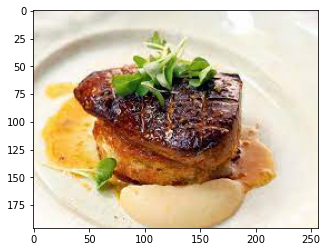

The prediction is:  filet_mignon 

    filet_mignon  foie_gras  french_toast  frozen_yogurt    hummus  ice_cream  \
0      0.957399   0.011407      0.000223       0.000049  0.000461    0.00014   

   macarons  mussels  pad_thai     tacos  
0  0.000005  0.00027  0.029705  0.000341  


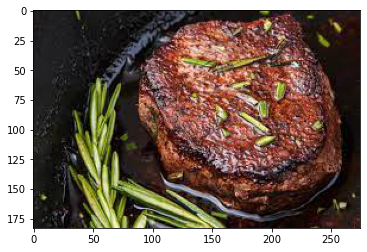

The prediction is:  filet_mignon 

    filet_mignon  foie_gras  french_toast  frozen_yogurt    hummus  ice_cream  \
0      0.376314   0.067872      0.195647       0.002365  0.019726   0.006483   

   macarons   mussels  pad_thai     tacos  
0   0.00159  0.022374   0.29854  0.009088  


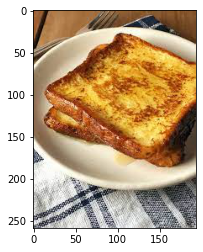

The prediction is:  french_toast 

    filet_mignon  foie_gras  french_toast  frozen_yogurt    hummus  \
0      0.000002   0.000009      0.999981   3.167827e-08  0.000003   

      ice_cream      macarons       mussels  pad_thai         tacos  
0  1.472796e-07  4.770661e-08  6.192159e-07  0.000003  2.539912e-07  


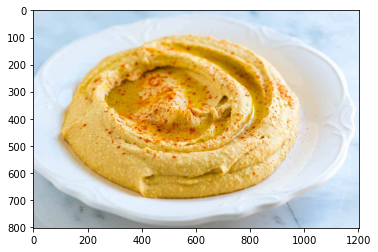

The prediction is:  hummus 

    filet_mignon     foie_gras  french_toast  frozen_yogurt  hummus  \
0  3.925238e-09  1.199405e-07  1.117867e-09   1.108952e-09     1.0   

      ice_cream      macarons       mussels      pad_thai         tacos  
0  8.632658e-10  3.148732e-10  2.142716e-10  4.037816e-08  3.214422e-09  


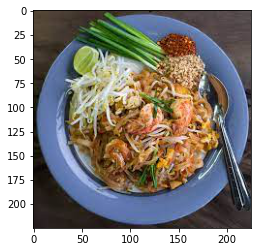

The prediction is:  pad_thai 

    filet_mignon     foie_gras  french_toast  frozen_yogurt        hummus  \
0  6.266546e-08  1.000088e-09  1.351839e-07   5.833497e-10  2.798821e-07   

      ice_cream      macarons       mussels  pad_thai         tacos  
0  3.144026e-10  2.080593e-10  4.898529e-08  0.999999  1.427747e-07  


In [18]:
# Make prediction for the image you downloaded from internet
import matplotlib.pyplot as plt
img = 'foie_gras.jpg' # the picture you downloaded from internet, which contains a type of food in your food list
plt.imshow(plt.imread(img))
plt.show()

img_array = image_process(img)
prob_df, result = prediction(model, img_array, food_list)
print('The prediction is: ', result, '\n\n', prob_df)

# 2nd image
img = 'filet_mignon.jpeg' # the picture you downloaded from internet, which contains a type of food in your food list
plt.imshow(plt.imread(img))
plt.show()

img_array = image_process(img)
prob_df, result = prediction(model, img_array, food_list)
print('The prediction is: ', result, '\n\n', prob_df)

# 3rd image
img = 'french_toast.jpg' # the picture you downloaded from internet, which contains a type of food in your food list
plt.imshow(plt.imread(img))
plt.show()

img_array = image_process(img)
prob_df, result = prediction(model, img_array, food_list)
print('The prediction is: ', result, '\n\n', prob_df)

# 4th image
img = 'hummus.jpg' # the picture you downloaded from internet, which contains a type of food in your food list
plt.imshow(plt.imread(img))
plt.show()

img_array = image_process(img)
prob_df, result = prediction(model, img_array, food_list)
print('The prediction is: ', result, '\n\n', prob_df)

# 5th image
img = 'pad_thai.jpg' # the picture you downloaded from internet, which contains a type of food in your food list
plt.imshow(plt.imread(img))
plt.show()

img_array = image_process(img)
prob_df, result = prediction(model, img_array, food_list)
print('The prediction is: ', result, '\n\n', prob_df)